ANALISIS EXPLORATORIO DE DATOS

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/Datos_Homicidios.csv")
df.head(2)

,ID,Año,Mes,Hora,Dia,Lugar,Calle_ppal,Calle_sec,Comuna,Longitud,Latitud,Victima,Acusado,Rol_vic,Sexo,Edad,Fecha_fallec,Barrios
0,2016-0001,2016,1,4,Friday,AVENIDA,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.",8,-58.47533969,-34.68757022,MOTO,AUTO,CONDUCTOR,M,19,SI,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI
1,2016-0004,2016,1,0,Sunday,AVENIDA,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.",8,-58.46503904,-34.68092974,MOTO,SD,CONDUCTOR,M,18,SD,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            715 non-null    object
 1   Año           715 non-null    int64 
 2   Mes           715 non-null    int64 
 3   Hora          715 non-null    object
 4   Dia           715 non-null    object
 5   Lugar         715 non-null    object
 6   Calle_ppal    715 non-null    object
 7   Calle_sec     540 non-null    object
 8   Comuna        715 non-null    int64 
 9   Longitud      715 non-null    object
 10  Latitud       715 non-null    object
 11  Victima       715 non-null    object
 12  Acusado       715 non-null    object
 13  Rol_vic       715 non-null    object
 14  Sexo          715 non-null    object
 15  Edad          715 non-null    object
 16  Fecha_fallec  715 non-null    object
 17  Barrios       715 non-null    object
dtypes: int64(3), object(15)
memory usage: 100.7+ KB


El dataframe consta de 715 registros en su totalidad. Con respecto a los datos nulos, solo la columna "calle_sec" tiene 540 registros y 175 lineas vacías. Esto de debe a que cuando el accidente ocurre en el tramo de alguna calle, no existe calle secundaria o intersección donde sucede el sinisestro.

In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            715 non-null    object
 1   Año           715 non-null    int64 
 2   Mes           715 non-null    int64 
 3   Hora          715 non-null    object
 4   Dia           715 non-null    object
 5   Lugar         715 non-null    object
 6   Calle_ppal    715 non-null    object
 7   Calle_sec     540 non-null    object
 8   Comuna        715 non-null    int64 
 9   Longitud      715 non-null    object
 10  Latitud       715 non-null    object
 11  Victima       715 non-null    object
 12  Acusado       715 non-null    object
 13  Rol_vic       715 non-null    object
 14  Sexo          715 non-null    object
 15  Edad          715 non-null    object
 16  Fecha_fallec  715 non-null    object
 17  Barrios       715 non-null    object
dtypes: int64(3), object(15)
memory usage: 106.1+ KB


El dataframe no contiene registros duplicados

Con respecto a la columna "Calle_sec", procederemos a reemplazar aquellos registros vacios por "SD" haciendo referencia a "Sin Datos"

In [8]:
# Contar la cantidad de datos vacíos en una columna - VERIFICO -
datos_vacios = df["Calle_sec"].isnull().sum()
datos_vacios

175

In [10]:
# Reemplazar NaN en la columna con "SD"
df["Calle_sec"] = df["Calle_sec"].fillna("SD")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            715 non-null    object
 1   Año           715 non-null    int64 
 2   Mes           715 non-null    int64 
 3   Hora          715 non-null    object
 4   Dia           715 non-null    object
 5   Lugar         715 non-null    object
 6   Calle_ppal    715 non-null    object
 7   Calle_sec     715 non-null    object
 8   Comuna        715 non-null    int64 
 9   Longitud      715 non-null    object
 10  Latitud       715 non-null    object
 11  Victima       715 non-null    object
 12  Acusado       715 non-null    object
 13  Rol_vic       715 non-null    object
 14  Sexo          715 non-null    object
 15  Edad          715 non-null    object
 16  Fecha_fallec  715 non-null    object
 17  Barrios       715 non-null    object
dtypes: int64(3), object(15)
memory usage: 106.1+ KB


Conversión de tipo de datos

Como en las columnas Hora y Edad tengo valores "SD", voy a convertir los mismos en 0 y 25 respectivamente, para proceder con el análisis.

In [13]:
# Reemplazar "SD" por 0 y 25

df["Hora"] = df["Hora"].replace("SD", 0)
df["Edad"] = df["Edad"].replace("SD", 0)

In [18]:
# Convertir la columna de object a int

df["Hora"] = df["Hora"].astype(int)
df["Edad"] = df["Edad"].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            715 non-null    object
 1   Año           715 non-null    int64 
 2   Mes           715 non-null    int64 
 3   Hora          715 non-null    int64 
 4   Dia           715 non-null    object
 5   Lugar         715 non-null    object
 6   Calle_ppal    715 non-null    object
 7   Calle_sec     715 non-null    object
 8   Comuna        715 non-null    int64 
 9   Longitud      715 non-null    object
 10  Latitud       715 non-null    object
 11  Victima       715 non-null    object
 12  Acusado       715 non-null    object
 13  Rol_vic       715 non-null    object
 14  Sexo          715 non-null    object
 15  Edad          715 non-null    int64 
 16  Fecha_fallec  715 non-null    object
 17  Barrios       715 non-null    object
dtypes: int64(5), object(13)
memory usage: 106.1+ KB


Con respecto a las columnas Longitud y Latitud, procederemos a convertirlo en decimal

In [22]:
# Reemplazar "." por -58.47533969 (como no es relevante la ubicación tipo GPS, ya que esta cargado correctamente
# la comuna donde ocurrio el accidente)

df["Longitud"]= df["Longitud"].replace( "." ,-58.47533969)

In [21]:
# Convertir la columna de object a float

df["Longitud"] = df["Longitud"].astype(float)

In [23]:
# Reemplazar "." por -34.68757022

df["Latitud"]= df["Latitud"].replace( "." ,-34.68757022)

In [24]:
# Convertir la columna de object a float

df["Latitud"] = df["Latitud"].astype(float)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 0 to 714
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            715 non-null    object 
 1   Año           715 non-null    int64  
 2   Mes           715 non-null    int64  
 3   Hora          715 non-null    int64  
 4   Dia           715 non-null    object 
 5   Lugar         715 non-null    object 
 6   Calle_ppal    715 non-null    object 
 7   Calle_sec     715 non-null    object 
 8   Comuna        715 non-null    int64  
 9   Longitud      715 non-null    float64
 10  Latitud       715 non-null    float64
 11  Victima       715 non-null    object 
 12  Acusado       715 non-null    object 
 13  Rol_vic       715 non-null    object 
 14  Sexo          715 non-null    object 
 15  Edad          715 non-null    int64  
 16  Fecha_fallec  715 non-null    object 
 17  Barrios       715 non-null    object 
dtypes: float64(2), int64(5), objec

RESUMEN ESTADÍSTICO

In [26]:
df.describe()

,Año,Mes,Hora,Comuna,Longitud,Latitud,Edad
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,2018.180420,6.675524,11.542657,7.451748,-58.442183,-34.620744,39.159441
std,1.671028,3.570954,6.697281,4.373508,0.046225,0.036002,21.944092
min,2016.000000,1.000000,0.000000,1.000000,-58.529942,-34.705250,0.000000
25%,2017.000000,4.000000,6.000000,4.000000,-58.475973,-34.645468,24.000000
50%,2018.000000,7.000000,11.000000,8.000000,-58.444979,-34.623528,35.000000
75%,2019.000000,10.000000,17.000000,11.000000,-58.402695,-34.597212,55.000000
max,2021.000000,12.000000,23.000000,15.000000,-58.356082,-34.534654,95.000000


Distribución de variables NUMÉRICAS

Graficaremos Histogramas para visualizar y comprender la distribución de los datos numéricos.

In [27]:
# Selecciona las variables numéricas de interés
numeric_variables = df[["Año", "Mes", "Hora", "Comuna", "Longitud", "Latitud", "Edad"]]


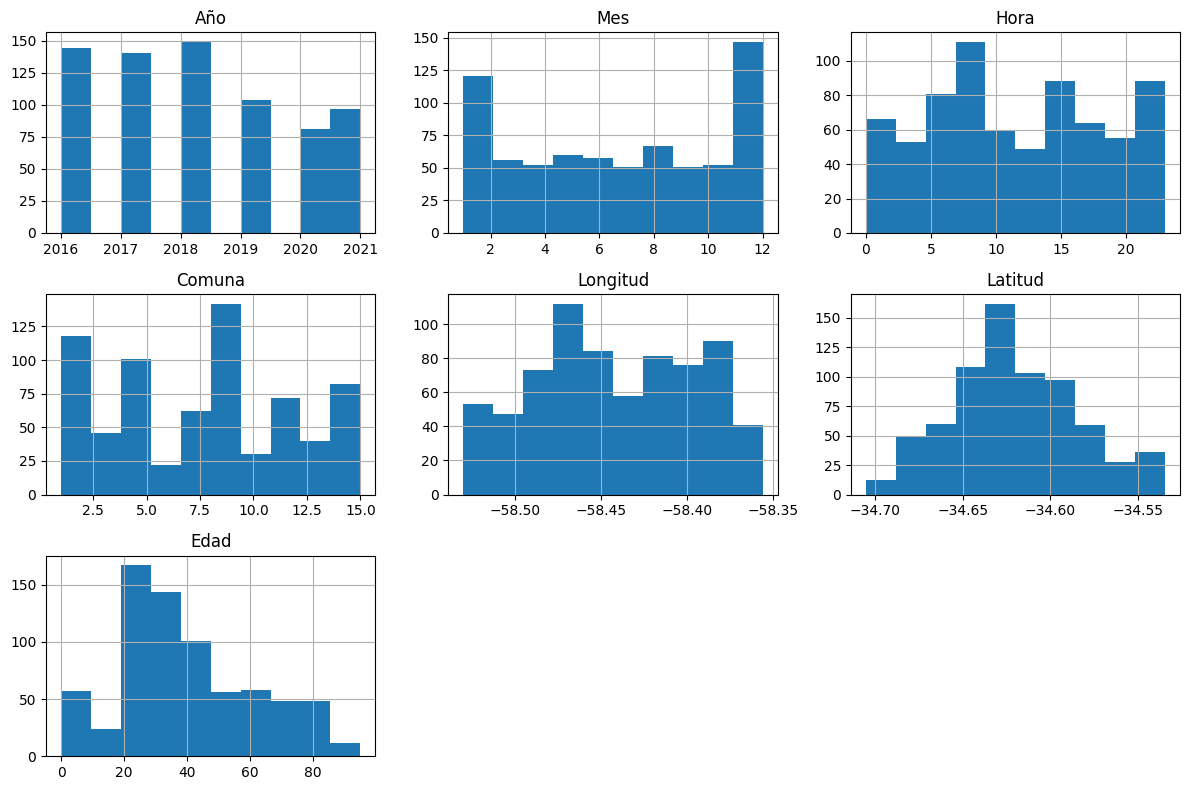

In [29]:
# Genera histogramas para las variables numéricas
numeric_variables.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

ANALISIS con la información visualizada:


  - La cantidad de victimas se mantiene estable durante el periodo 2016 al 2019, a partir del cual se denota una disminución de la misma

  - La mayor cantidad de víctimas ocurrieron durante los meses de diciembre y enero

  - La hora de ocurrencia de siniestros fluctúa entre maximos y minimos, donde se denota mayor densidad desde las 5am hasta las 9am

  - Las comunas que tienen mayor frecuencia de siniestros corresponden a la comuna 1, 4 y 8

  - El rango de edades de la mayor cantidad de víctimas va desde los 20 años hasta los 45 años, aproximadamente

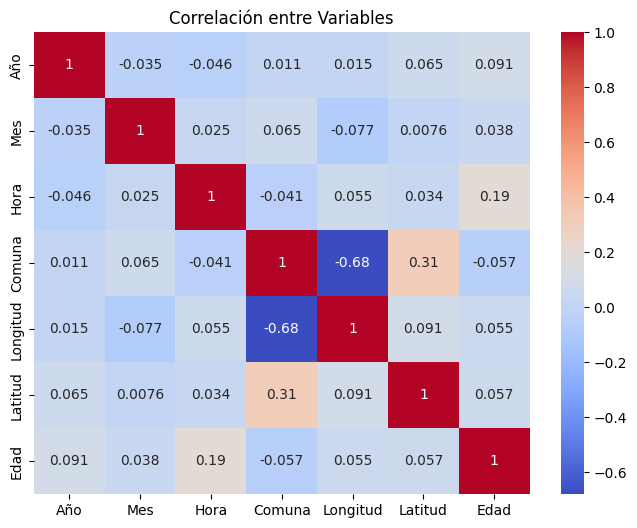

In [31]:
## Gráfico de calor
selected_df = df[["Año", "Mes", "Hora", "Comuna", "Longitud", "Latitud", "Edad"]]

# Calculo la matriz de correlación
correlation_matrix = selected_df.corr()

# Genero el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables')
plt.show()



Podemos ver que toma importancia  la relación de la edad de las víctimas con la hora de ocurrencia del siniestro.

Distribución de variables CATEGÓRICAS


Procederemos a un análisis de las variables dia, lugar y medio móvil en cual se trasladaba la víctima

  - Variable "Dia"

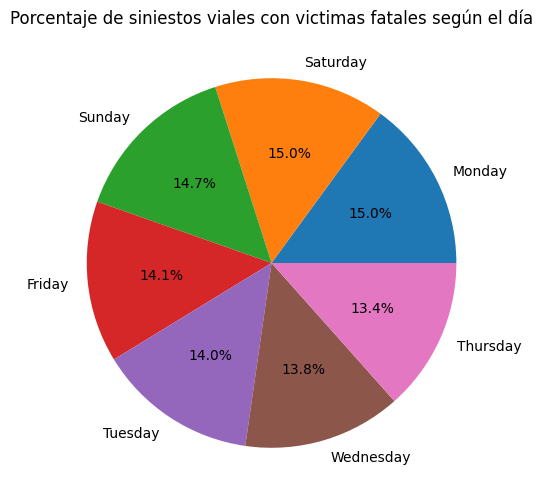

In [34]:
# Obtener el recuento
days_counts = df["Dia"].value_counts()

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(days_counts, labels=days_counts.index, autopct='%1.1f%%')
plt.title("Porcentaje de siniestos viales con victimas fatales según el día")

# Mostrar la gráfica
plt.show()



A priori, se puede ver que la mayor cantidad de victimas fatales se produjeron los dias Lunes y Sabado, aunque en general es bastante estable los porcentajes

  - Variable "Lugar"

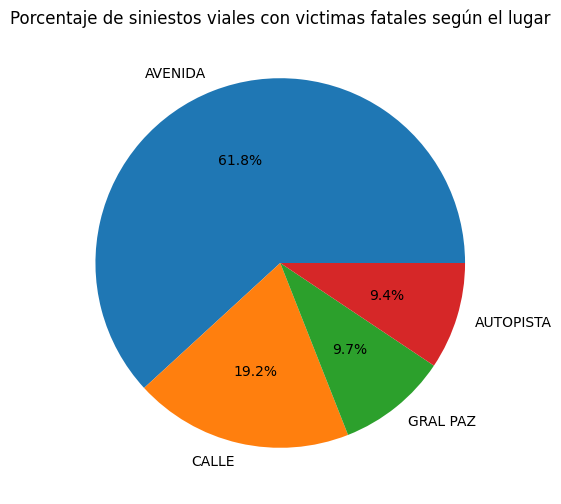

In [36]:
# Obtener el recuento
point_counts = df["Lugar"].value_counts()

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(point_counts, labels=point_counts.index, autopct='%1.1f%%')
plt.title("Porcentaje de siniestos viales con victimas fatales según el lugar")

# Mostrar la gráfica
plt.show()

El mayor porcentaje de siniestros viajes observados ocurrio en AVENIDAS, seguido por ocurrencias en CALLE

  - Variable "Victima"

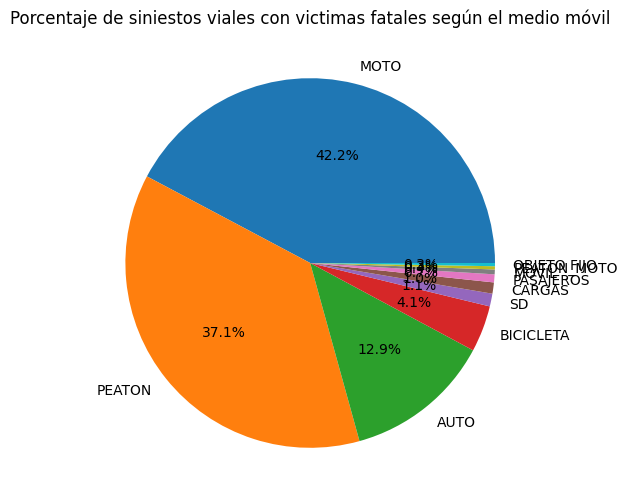

In [38]:
# Obtener el recuento
v_counts = df["Victima"].value_counts()

# Crear la gráfica de torta
plt.figure(figsize=(8, 6))
plt.pie(v_counts, labels=point_counts.index, autopct='%1.1f%%')
plt.title("Porcentaje de siniestos viales con victimas fatales según el medio móvil")

# Mostrar la gráfica
plt.show()

La mayor cantidad de victimas fatales en siniestros viales eran aquellas que se trasladaban en moto y a pie (peatón)

Recurro a Tabla de Contingencia para ver el recuento en una tabla de doble entrada, y evaluar la relación entre los datos de dos columnas

  - Relación entre el día del siniestro con el medio móvil de la víctima

In [40]:
# Tabla de contingencia Dia / Víctima
pd.crosstab(index=df["Dia"],columns=df["Victima"], margins=True)


Victima,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,OBJETO FIJO,PASAJEROS,PEATON,PEATON_MOTO,SD,All
Dia,,,,,,,,,,,
Friday,6,5,2,37,2,0,2,46,0,1,101
Monday,16,2,0,48,0,0,2,39,0,0,107
Saturday,15,4,1,50,0,2,0,33,2,0,107
Sunday,32,0,0,45,0,0,1,23,0,4,105
Thursday,12,7,2,38,0,0,0,36,0,1,96
Tuesday,4,2,2,47,0,0,0,43,0,2,100
Wednesday,7,9,0,37,1,0,0,45,0,0,99
All,92,29,7,302,3,2,5,265,2,8,715


Como era de esperarse, la mayor cantidad de victimas fatales se trasladaban en moto y a pie; pero además podemos ver que la ocurrencia es levemente mayor los fin de semanas - desde día viernes a dia lunes inclusive -

  - Relación entre el lugar del siniestro con el medio móvil de la víctima

In [41]:
# Tabla de contingencia Lugar / Víctima
pd.crosstab(index=df["Lugar"],columns=df["Victima"], margins=True)


Victima,AUTO,BICICLETA,CARGAS,MOTO,MOVIL,OBJETO FIJO,PASAJEROS,PEATON,PEATON_MOTO,SD,All
Lugar,,,,,,,,,,,
AUTOPISTA,11,0,2,42,0,0,0,11,0,1,67
AVENIDA,53,18,2,174,3,0,4,186,0,2,442
CALLE,11,11,1,50,0,0,1,57,2,4,137
GRAL PAZ,17,0,2,36,0,2,0,11,0,1,69
All,92,29,7,302,3,2,5,265,2,8,715


Podemos denotar que el lugar donde ocurren la mayoria de los siniestros viales con víctimas fatales es en AVENIDAS y los mismos se trasladaban en moto o a pie mayoritariamente; En una menor participación la víctima se trasladaba en auto